<h2 align="center">Codebasics ML Course: Logistic Regression Tutorial (Multiclass Classification)</h2>

Problem Statement: Classify an IRIS flower into one of the three categories ['setosa', 'versicolor', 'virginica'] based on their petal and sepal width and height. We will use logistic regression for this classification problem

<img width=300 height=300 src="iris.png" />

In [49]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

### Load Data

In [48]:
iris = load_iris(as_frame=True)
iris.keys()
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Data Visualization

In [44]:
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

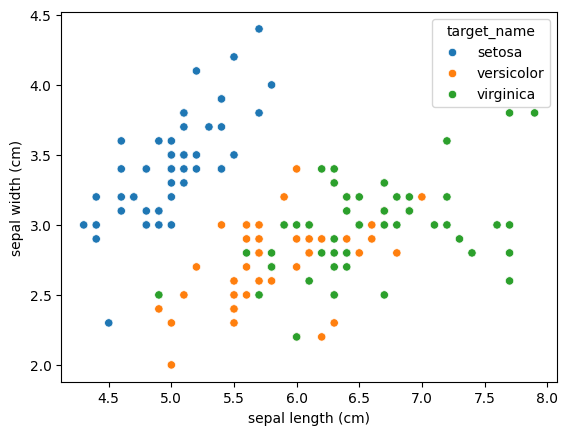

In [46]:
sns.scatterplot(df, x="sepal length (cm)", y="sepal width (cm)", hue="target_name")

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

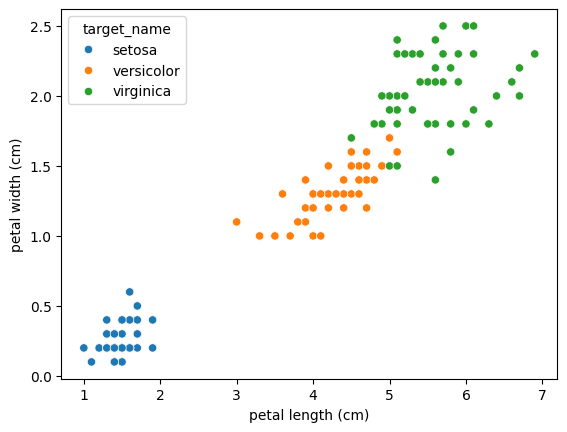

In [47]:
sns.scatterplot(df, x="petal length (cm)", y="petal width (cm)", hue="target_name")

In [45]:
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df["target"]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y[:4]

0    0
1    0
2    0
3    0
Name: target, dtype: int32

### Train a Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Train logistic regression model 
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

### Model Evaluation: Accuracy

In [51]:
model.score(X_test, y_test)

0.9777777777777777

### Model Evaluation: Precision, Recall, F1-Score

In [52]:
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1])

In [53]:
y_test[:10].tolist()

[1, 2, 2, 0, 2, 1, 0, 1, 0, 1]

In [54]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Model Evaluation: Confusion Matrix

In [55]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

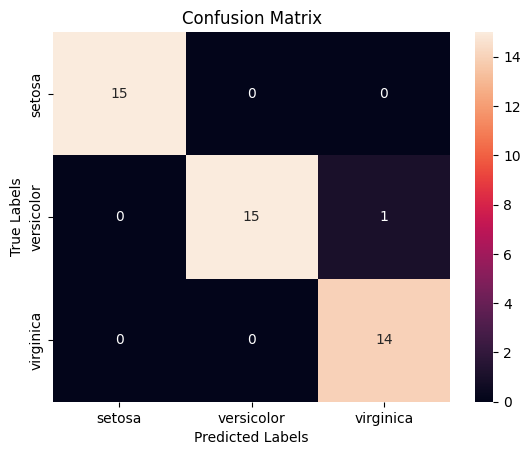

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)   
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()